In [1]:
import yfinance as yf
import pandas as pd
import matplotlib

In [3]:
#input text file of tickers separated by spaces
with open('stocks.txt','r') as f: #must open read only for some reason
    stock_txt = f.read()

stocks = stock_txt.split()

                     2021-12-31 2020-12-31 2019-12-31 2018-12-31
Asset Turnover         1.412843   1.000709   1.231358   1.398798
Return on Equity       0.487106   0.066873   0.122722   0.241089
Operating Margin       0.254271   0.079649   0.085566   0.132631
Profit Margin          0.264394   0.035849   0.069292   0.131735
Debt to Equity          0.80044    0.82434   0.729252   0.788251
Debt to Total Assets   0.434467   0.441906   0.411754   0.430712
                     2021-12-31 2020-12-31 2019-12-31 2018-12-31
Asset Turnover         1.469037   1.036255   1.264535   1.534594
Return on Equity       0.509794   0.126767   0.164654   0.319786
Operating Margin       0.233643   0.090252   0.094303   0.145697
Profit Margin          0.256484   0.059448   0.081093    0.16335
Debt to Equity         0.985157    1.13168   1.033141   0.969826
Debt to Total Assets   0.495647   0.530711   0.508824   0.495399
                     2021-12-31 2020-12-31 2019-12-31 2018-12-31
Asset Turnover         1.

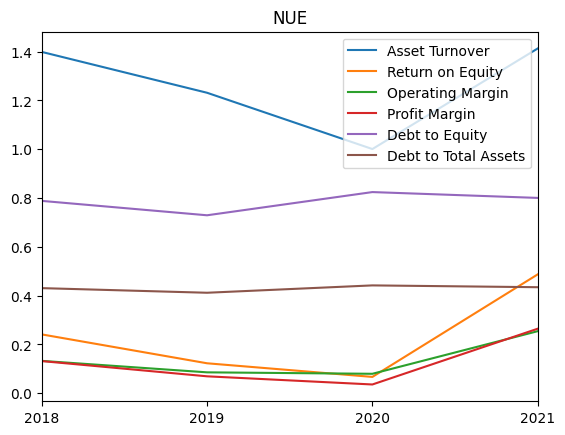

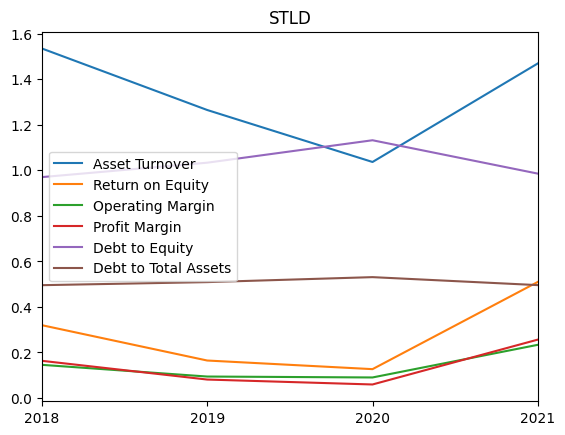

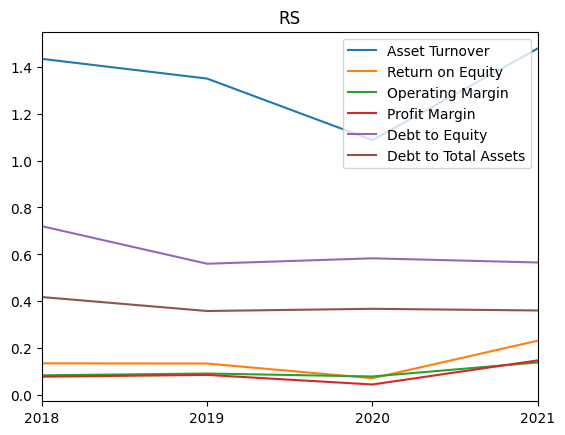

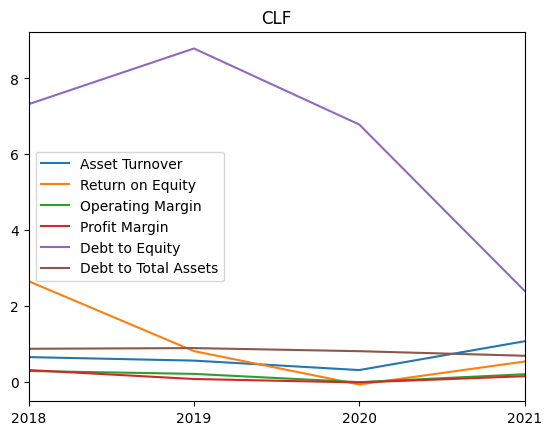

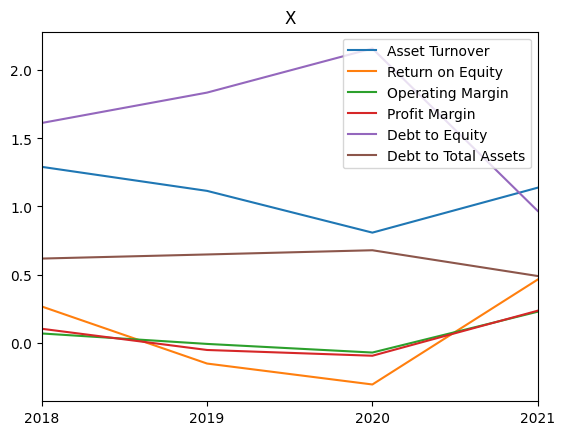

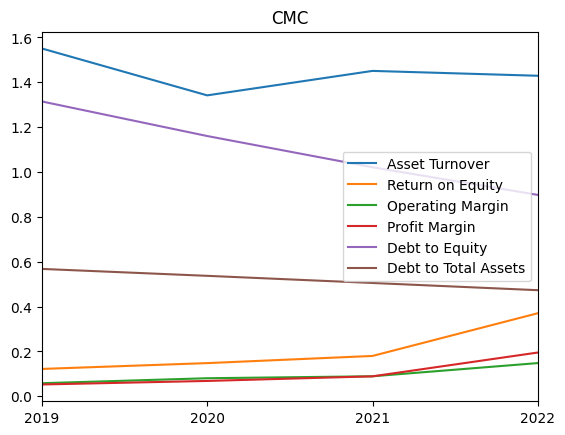

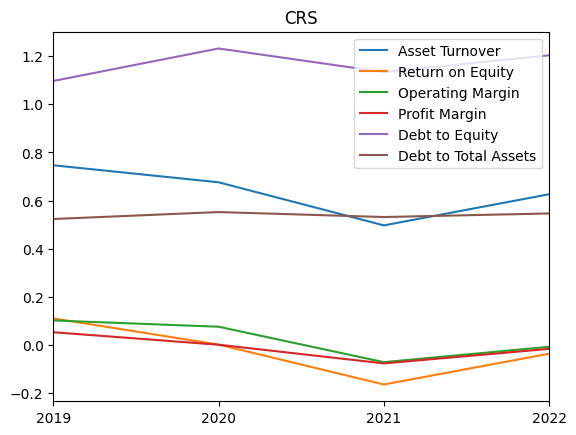

In [4]:
dataframes = []
for stock in stocks:
    ticker = yf.Ticker(stock)
    df = ticker.financials #income statement pandas dataframe
    df_b = ticker.balance_sheet #balance sheet pandas dataframe
    #find all relevant lines in balance sheet and income statement
    IS = df.loc[['Net Income','Operating Income','Total Revenue']]
    BS = df_b.loc[['Total Assets', 'Total Stockholder Equity','Total Liab']]
    dff = pd.concat([IS,BS], axis = 0)
    #calculate ratios
    dff.loc['Asset Turnover'] = dff.loc['Total Revenue']/dff.loc['Total Assets']
    dff.loc['Return on Equity'] = dff.loc['Net Income']/dff.loc['Total Stockholder Equity']
    dff.loc['Operating Margin'] = dff.loc['Operating Income']/dff.loc['Total Revenue']
    dff.loc['Profit Margin'] = dff.loc['Net Income']/dff.loc['Total Assets']
    dff.loc['Debt to Equity'] = dff.loc['Total Liab']/dff.loc['Total Stockholder Equity']
    dff.loc['Debt to Total Assets'] = dff.loc['Total Liab']/dff.loc['Total Assets']
    #drop lines used to calculate
    dff = dff.drop(['Net Income','Operating Income','Total Revenue','Total Assets', 'Total Stockholder Equity','Total Liab'], axis = 0)
    print(dff)
    #transpose and plot
    dff = dff.transpose()
    dataframes.append(dff)
    dff.plot(kind = 'line')
    matplotlib.pyplot.title(stock)
    #export imate
    #matplotlib.pyplot.savefig(f'{stock}.png')
    

In [11]:
dataframe = pd.concat(dataframes, axis = 0)
ratio_names = dataframe.columns
#print(dataframe.iloc[:,0])
avg_dict = {}
for year in list(dict.fromkeys(dataframe.index.year)):
    avgs = []
    df_current = dataframe[dataframe.index.year==year]
    ratios = list(df_current.columns)
    for ratio in ratios:
        avgs.append(df_current[ratio].mean())
    avg_dict[year] = avgs
    print(avgs)

avg_df = pd.DataFrame.from_dict(avg_dict, orient = 'index',columns = ratio_names )
print(avg_df)
avg_df.plot(kind = 'line')
matplotlib.pyplot.title('Industry Averages')


[1.21752194893724, 0.32165399092568725, 0.15433479041698409, 0.15321965084095382, 1.1254268900121238, 0.5017824354207961]
[0.8955023621434473, 0.006658725413666135, 0.04750656683510564, 0.015126479732641826, 1.9825178058762367, 0.5606553458175448]
[1.1179065910881707, 0.18834805224398563, 0.09153182682968299, 0.053013294393347905, 2.194078990985044, 0.5593761725972894]
[1.2637753446287472, 0.7241994830404802, 0.14489004147526316, 0.1589936595184447, 2.2824711802741966, 0.5683074725400246]
[1.0276776654306614, 0.16675660233880193, 0.06999435710791779, 0.08921124464116303, 1.0508922411915491, 0.509669126162938]
      Asset Turnover  Return on Equity  Operating Margin  Profit Margin  \
2021        1.217522          0.321654          0.154335       0.153220   
2020        0.895502          0.006659          0.047507       0.015126   
2019        1.117907          0.188348          0.091532       0.053013   
2018        1.263775          0.724199          0.144890       0.158994   
2022    